___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install scikit-plot

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# NLP EDA liabs
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# METRICS
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from scikitplot.metrics import plot_roc, plot_precision_recall ,roc_curve
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [3]:
nltk.download('punkt')       # Loads the necessary files for sentence and word tokenization.
nltk.download('stopwords')   # loads stopword datasets
nltk.download('wordnet')     # loads the necessary files for normalization.
nltk.download('omw-1.4')
# omw-1.4 is a dataset used to determine the meanings of words and expressions occurring in a text.
# It is used in the normalization processes applied to words/tokens to establish the semantic relationship between the original form of a word and its
# stemmed form, in order to reduce words to their roots.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# mounted with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Data Wrangling

In [5]:
#load the dataset
path = "/content/gdrive/MyDrive/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
df.shape

(23486, 11)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

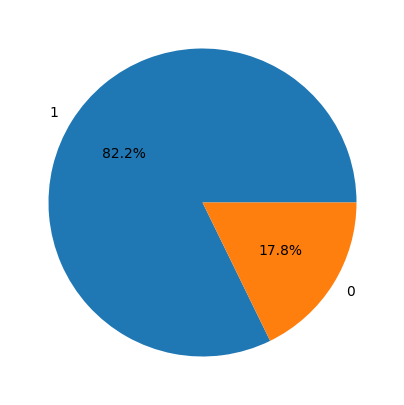

In [ ]:
df["Recommended IND"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(5, 5))
plt.ylabel("");
# Below is Pie chart for the Recommended it's show the percentage of the Recommended's values

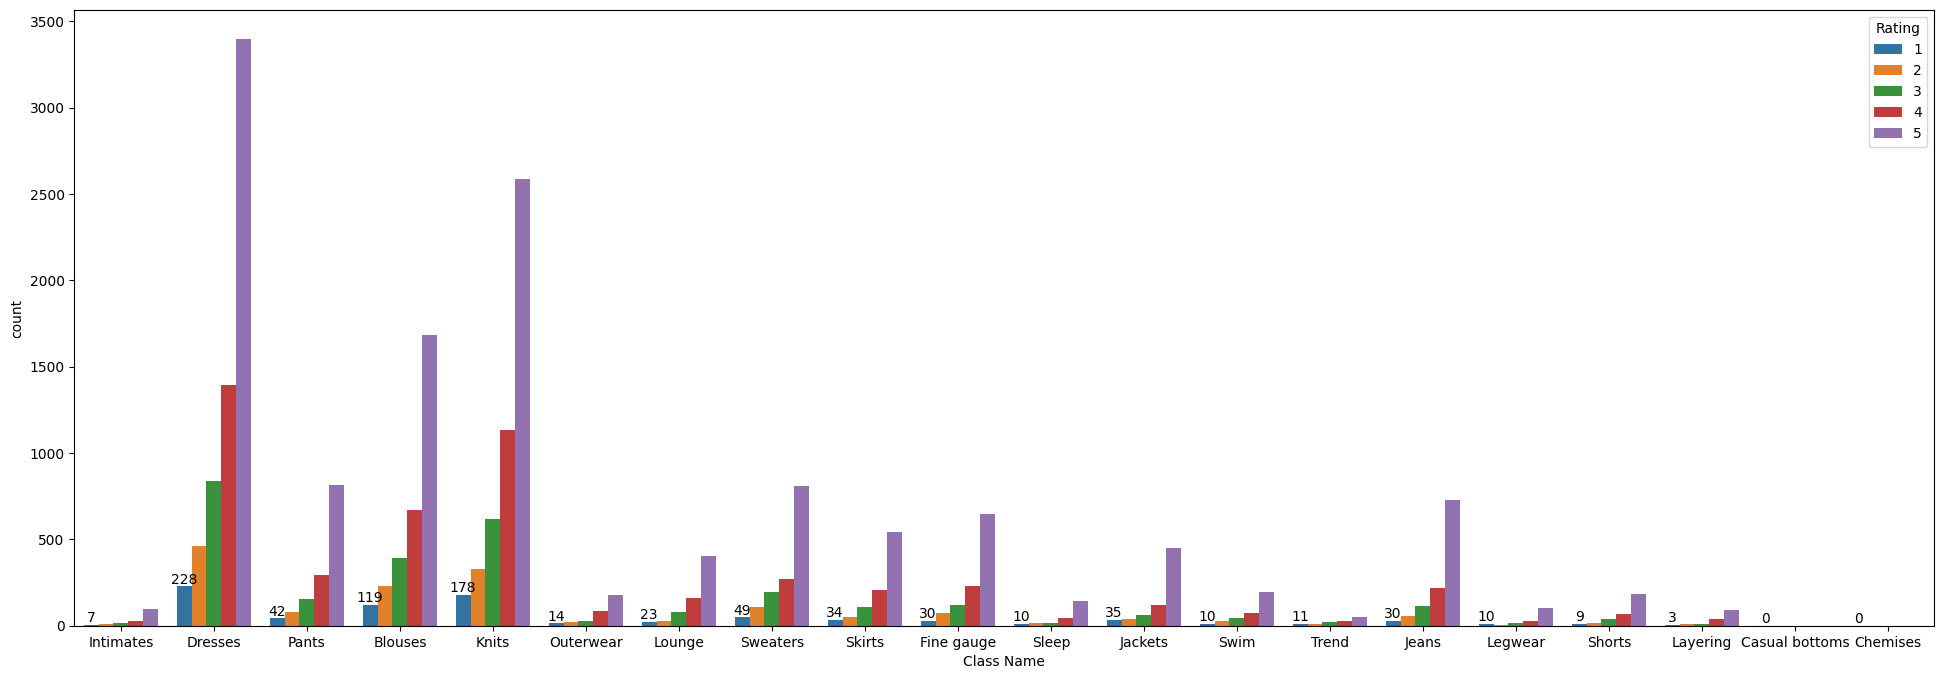

In [ ]:
# Count plot for the class name subdivided by Rating
plt.figure(figsize=(24, 8))# Set default figure size
ax = sns.countplot(x= "Class Name", data = df , hue = "Rating")
ax.bar_label(ax.containers[0]);

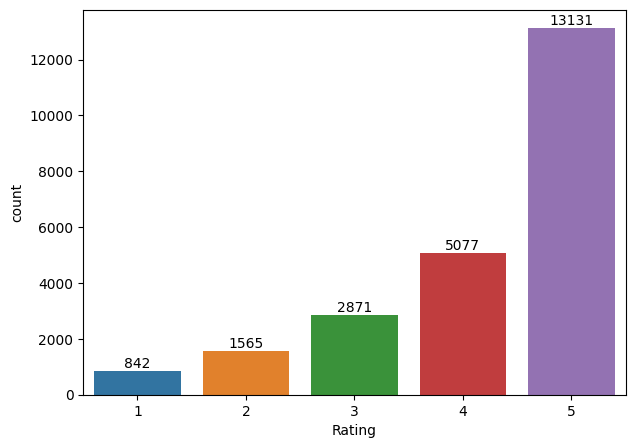

In [ ]:
plt.figure(figsize=(7, 5))# Set default figure size
ax = sns.countplot(x= "Rating", data = df )
ax.bar_label(ax.containers[0]);

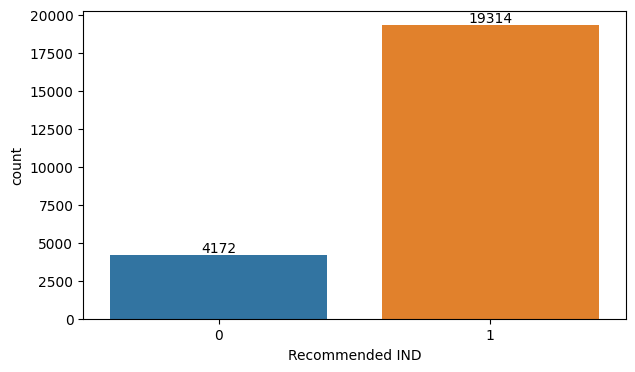

In [ ]:
#plt.figure(figsize=(7, 5))# Set default figure size
ax = sns.countplot(x= "Recommended IND", data = df )
ax.bar_label(ax.containers[0]);

Check NULL values

In [ ]:
# Checking Null values
df.isnull().sum()
# There are a much null values for title and review text
# also division , department and class names has 14 null values

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Features woth Null Values :


*   Title  : 3810
*   Review Text  : 845
*  Division Name  : 14
*   Department Name  : 14
*   Class Name :  14



-----------------------------------------------------------------
------------------------------------------------------------------


Ckeck DUPLICATES

In [ ]:
df.duplicated().sum()
# No duplicates

0

In [16]:
df_new = df.copy()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [17]:
df_new =df_new[["Review Text", "Recommended IND"]]
df_new.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [18]:
df_new.rename(columns={'Recommended IND': 'Recommendation'}, inplace=True)

In [19]:
df_new.rename(columns={'Review Text': 'ReviewText'}, inplace=True)

In [20]:
df_new.head()

,ReviewText,Recommendation
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [21]:
# Checking Null values for the new Dataframe
df_new.isnull().sum()

ReviewText        845
Recommendation      0
dtype: int64

In [22]:
# Dropping Null values
df_new = df_new.dropna(axis=0,  how = 'all', subset=['ReviewText'])

In [23]:
# Dataframe after dropping null values
df_new.isnull().sum()


ReviewText        0
Recommendation    0
dtype: int64

Ckeck DUPLICATES

In [24]:
df_new.duplicated().sum()

7

In [25]:
# Remove Duplicates Values
df_new.drop_duplicates(inplace = True)

In [26]:
df_new.duplicated().sum()

0

In [27]:
#Reset the indexes after deleting null and duplicates values
df_new.reset_index(drop=True, inplace=True)

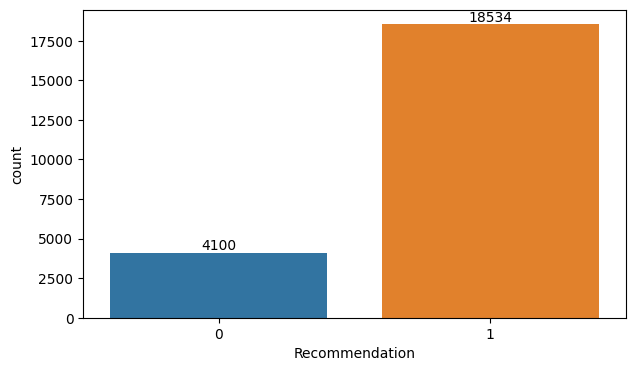

In [19]:
ax = sns.countplot(x= "Recommendation", data = df_new )
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [150]:
# Import stop words
from nltk.corpus import stopwords

In [151]:
stop_words = stopwords.words("english")
stop_words

# We obtain the list of stopwords for English. To get stopwords for a specific language, we write the desired language inside parentheses.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_new["ReviewText"]

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22629    I was very happy to snag this dress at such a ...
22630    It reminds me of maternity clothes. soft, stre...
22631    This fit well, but the top was very see throug...
22632    I bought this dress for a wedding i have this ...
22633    This dress in a lovely platinum is feminine an...
Name: ReviewText, Length: 22634, dtype: object

In [152]:
for i in ["not", "no"]:
        stop_words.remove(i)

# We remove the tokens "not" and "no" from the stop_words list.

Cleaning Function (Tokenization , Removing Noise , Removing Stopwords , Lemmatization)

In [153]:
def cleaning_fsa(data):

    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')

    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower())

    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #6. joining
    return " ".join(text_cleaned)

# If you are going to perform sentiment analysis, you can use this function.

In [154]:
# Apply Cleaning function
Clean_ReviewText = df_new["ReviewText"].apply(cleaning_fsa)
# We are cleaning the text and assigning it to the variable 'cleaning_text'.

In [ ]:
Clean_ReviewText.head(10)

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one not petite foot tal...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
8    love dress usually get x run little snug bust ...
9    im lb ordered petite make sure length wasnt lo...
Name: ReviewText, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [25]:
from wordcloud import WordCloud

In [ ]:
Positive_Reviews = df_new[df_new["Recommendation"] == 1]["ReviewText"]
Positive_Reviews = Positive_Reviews.apply(cleaning_fsa)
Positive_Reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22628    wasnt sure ordering skirt couldnt see person f...
22629    happy snag dress great price easy slip flatter...
22630    reminds maternity clothes soft stretchy shiny ...
22632    bought dress wedding summer cute unfortunately...
22633    dress lovely platinum feminine fit perfectly e...
Name: ReviewText, Length: 18534, dtype: object

In [ ]:
Negative_Reviews = df_new[df_new["Recommendation"] == 0]["ReviewText"]
Negative_Reviews = Negative_Reviews.apply(cleaning_fsa)
Negative_Reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22599    tried color really pretty fun donset want pair...
22600    wanted love jacket soft great color unfortunat...
22610    purchased good price typically love maeve fabr...
22627    surprised positive review product terrible cut...
22631    fit well top see never would worked im glad ab...
Name: ReviewText, Length: 4100, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(Positive_Reviews)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [ ]:
negative_words = " ".join(Negative_Reviews)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

**Positive Words**

In [ ]:
positive_wordcloud = WordCloud(background_color="pink",
                               max_words =250,
                               scale=3)

In [ ]:
positive_wordcloud.generate(positive_words)

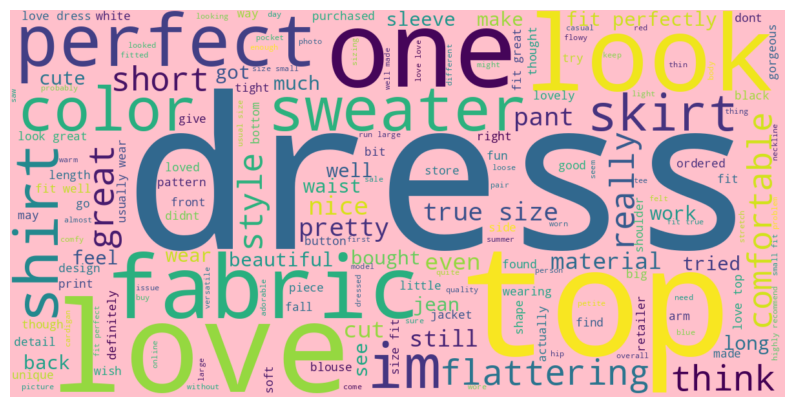

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(positive_wordcloud,
           interpolation="bilinear")
plt.axis("off")
plt.show()

**Negative Words**

In [ ]:
negative_wordcloud = WordCloud(background_color="pink",
                               max_words=250,
                               colormap='inferno',
                               scale=3)

In [ ]:
negative_wordcloud.generate(negative_words)

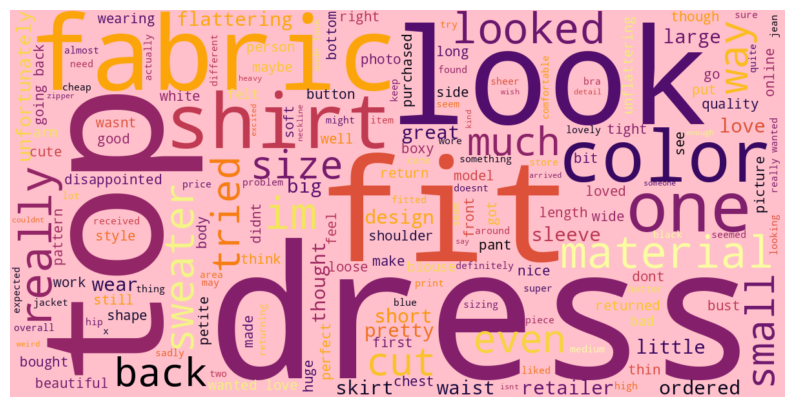

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(negative_wordcloud ,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
X = df_new["ReviewText"]
y = df_new["Recommendation"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [156]:
vectorizer = CountVectorizer(preprocessor=cleaning_fsa, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
# By assigning the cleaning function we defined above to the 'preprocessor' parameter, we can perform the cleaning process within the CountVectorizer
# transformation algorithm.
# min_df = 3 --> Ignore tokens that appear in less than 3 documents (comments) in the corpus.

In [157]:
# transform to array
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [158]:
#Convert array to dataframe
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())
# having 4907 features(uniqe terms) in my vocabulary with min_df=3 to minimize the features

,aa,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,...,yes,yesterday,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [159]:
# TF-IDF Vecroraization
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning_fsa, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
# By assigning the cleaning function we defined above to the 'preprocessor' parameter, we can perform the cleaning process within the TfidfVectorizer
# transformation algorithm.
# min_df = 3 --> Ignore tokens that appear in less than 3 documents (comments) in the corpus.

In [160]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [161]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,accidental,...,yes,yesterday,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [162]:
# Evaluation function
def Eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("  ")
    print("Confusion Matrix   ")
    print("---------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print("  ")
    print("Test_Set")
    print("---------------------------------")
    print(classification_report(y_test,y_pred))
    print("  ")
    print("Train_Set")
    print("---------------------------------")
    print(classification_report(y_train,y_pred_train))

In [163]:
# Cross Validation function
def CV_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}

    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1,11))
    return df_scores

In [164]:

def precision_recall_plot(model,X_test, y_test):
  y_pred_proba = model.predict_proba(X_test)

  plot_precision_recall(y_test, y_pred_proba)
  plt.show();

## Logistic Regression

### CountVectorizer

In [165]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=0.1,
                                    max_iter=1000,
                                    class_weight= "balanced",
                                    random_state=101,
                                    n_jobs=-1)
logistic_model.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=101)

In [166]:
print('--------------------------------------')
print('           Logistic Model             ')
print('--------------------------------------')
Eval(logistic_model , X_train_count, X_test_count)
# The Precision score of the zero(not recommended) class is a little bit low

--------------------------------------
           Logistic Model             
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 699  121]
 [ 491 3216]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       820
           1       0.96      0.87      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.78      0.86      0.80      4527
weighted avg       0.90      0.86      0.87      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3280
           1       0.98      0.89      0.93     14827

    accuracy                           0.90     18107
   macro avg       0.82      0.91      0.85     18107
weighted avg       0.92      0.90      0.90     18107



In [167]:
log_scores= CV_scores(logistic_model, X_train_count , y_train)
log_scores.mean()[2:]

test_accuracy      0.865577
train_accuracy     0.897173
test_precision     0.592204
train_precision    0.652305
test_recall        0.831402
train_recall       0.925881
test_f1            0.691514
train_f1           0.765379
dtype: float64

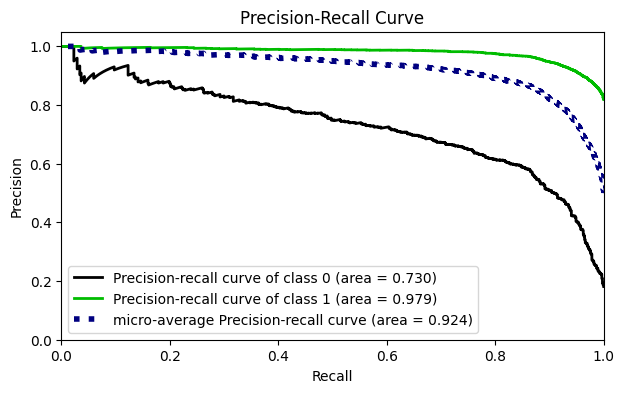

In [168]:
precision_recall_plot(logistic_model,X_test_count, y_test)

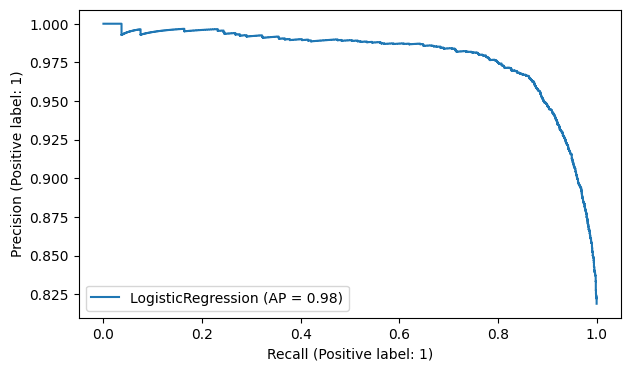

In [211]:
PrecisionRecallDisplay.from_estimator(logistic_model,X_test_count, y_test)

In [169]:
# save and store the scores to visualize them later
y_pred = logistic_model.predict(X_test_count)
y_pred_proba= logistic_model.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_recall = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [170]:

logistic_model_tfidf = LogisticRegression(C=0.1,
                                    max_iter=1000,
                                    class_weight= "balanced",
                                    random_state=101,
                                    n_jobs=-1)
logistic_model_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=101)

In [171]:
print('--------------------------------------')
print('           Logistic Model             ')
print('--------------------------------------')
Eval(logistic_model_tfidf , X_train_tf_idf, X_test_tf_idf)
# The TF-IDF scores of the zero(not recommended) class is lower than count vectorization

--------------------------------------
           Logistic Model             
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 715  105]
 [ 600 3107]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.54      0.87      0.67       820
           1       0.97      0.84      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.76      0.86      0.78      4527
weighted avg       0.89      0.84      0.86      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      3280
           1       0.97      0.85      0.91     14827

    accuracy                           0.86     18107
   macro avg       0.77      0.87      0.80     18107
weighted avg       0.90      0.86      0.87     18107



In [48]:
# Cross Validation
log_scores_tf= CV_scores(logistic_model_tfidf, X_train_tf_idf , y_train)
log_scores_tf.mean()[2:]

test_accuracy      0.845474
train_accuracy     0.857778
test_precision     0.547172
train_precision    0.568324
test_recall        0.857622
train_recall       0.893699
test_f1            0.667932
train_f1           0.694804
dtype: float64

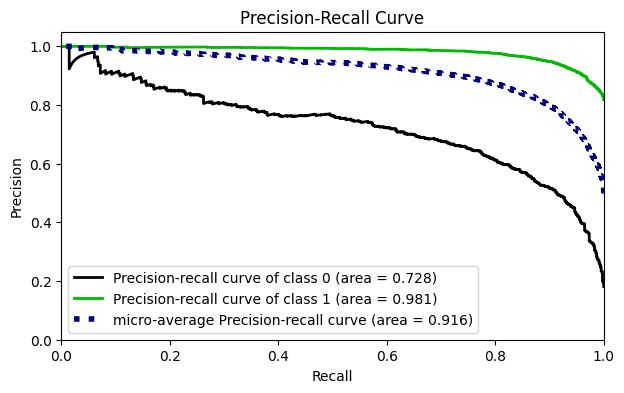

In [172]:
precision_recall_plot(logistic_model_tfidf,X_test_tf_idf, y_test)

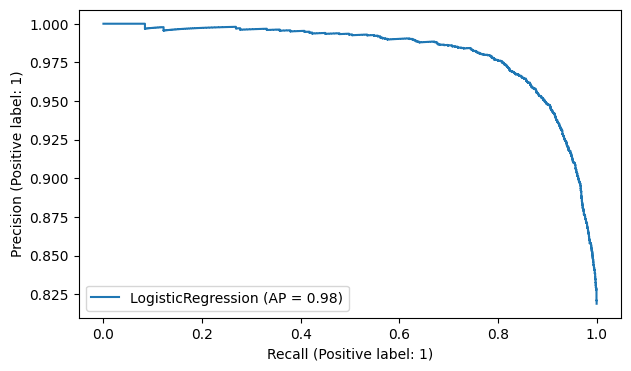

In [210]:
PrecisionRecallDisplay.from_estimator(logistic_model_tfidf,X_test_tf_idf, y_test)

In [173]:
# save and store the scores to visualize them later
y_pred = logistic_model_tfidf.predict(X_test_tf_idf)
y_pred_proba= logistic_model_tfidf.predict_proba(X_test_tf_idf)[:,1]

log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_recall = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [ ]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, force_alpha='warn', binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float or array-like of shape (n_features,), default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (set alpha=0 and force_alpha=True, for no smoothing).
 |  
 |  force_alpha : bool, default=False
 |      If False and alpha is less than 1e-10, it will set alpha to
 |      1e-10. If True, alpha will remain unchanged. This may cause
 |      numerical errors if alpha is too close to 0.
 |  
 |   

In [174]:
naiveBayes_model = BernoulliNB(alpha=0.1)
naiveBayes_model.fit(X_train_count,y_train)

BernoulliNB(alpha=0.1)

In [175]:
print('--------------------------------------')
print('           Naive Bayes Model          ')
print('--------------------------------------')
Eval(naiveBayes_model , X_train_count, X_test_count)
# the scores of naive bayes model best than logistic model of class 0

--------------------------------------
           Naive Bayes Model          
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 598  222]
 [ 321 3386]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.79      0.82      0.81      4527
weighted avg       0.89      0.88      0.88      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      3280
           1       0.96      0.92      0.94     14827

    accuracy                           0.91     18107
   macro avg       0.83      0.88      0.85     18107
weighted avg       0.92      0.91      0.91     18107



In [53]:
# Cross Validation
NB_scores = CV_scores(naiveBayes_model, X_train_count , y_train)
NB_scores.mean()[2:]

test_accuracy      0.879494
train_accuracy     0.909329
test_precision     0.647875
train_precision    0.709248
test_recall        0.735976
train_recall       0.846477
test_f1            0.688884
train_f1           0.771806
dtype: float64

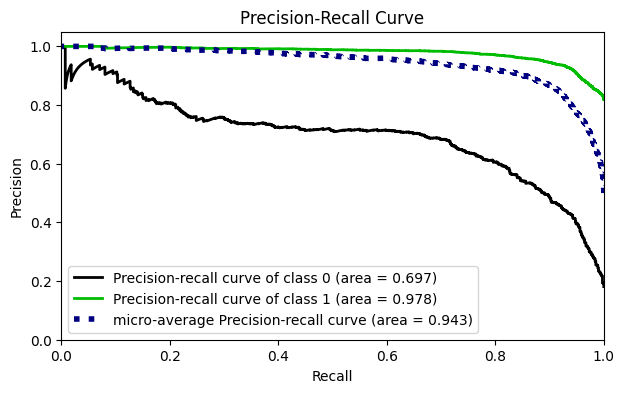

In [176]:
precision_recall_plot(naiveBayes_model,X_test_count, y_test)

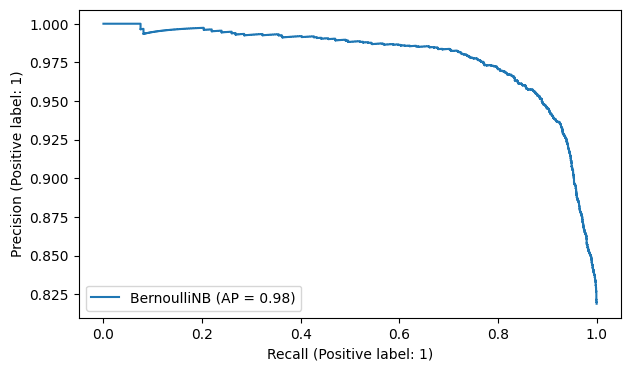

In [209]:
PrecisionRecallDisplay.from_estimator(naiveBayes_model,X_test_count, y_test)

In [177]:
# save and store the scores to visualize them later
y_pred = naiveBayes_model.predict(X_test_count)
y_pred_proba= naiveBayes_model.predict_proba(X_test_count)[:,1]

NB_AP_count = average_precision_score(y_test, y_pred_proba)
NB_count_recall = recall_score(y_test, y_pred)
NB_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [178]:
naiveBayes_model_tfidf = BernoulliNB(alpha=0.1)
naiveBayes_model_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.1)

In [179]:
print('--------------------------------------')
print('           Naive Bayes Model          ')
print('--------------------------------------')
Eval(naiveBayes_model_tfidf , X_train_tf_idf, X_test_tf_idf)
# No difference with count vecrtoizer

--------------------------------------
           Naive Bayes Model          
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 598  222]
 [ 321 3386]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.79      0.82      0.81      4527
weighted avg       0.89      0.88      0.88      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      3280
           1       0.96      0.92      0.94     14827

    accuracy                           0.91     18107
   macro avg       0.83      0.88      0.85     18107
weighted avg       0.92      0.91      0.91     18107



In [47]:
# Cross Validation
NB_scores_tf = CV_scores(naiveBayes_model_tfidf, X_train_tf_idf , y_train)
NB_scores_tf.mean()[2:]

test_accuracy      0.879494
train_accuracy     0.909329
test_precision     0.647875
train_precision    0.709248
test_recall        0.735976
train_recall       0.846477
test_f1            0.688884
train_f1           0.771806
dtype: float64

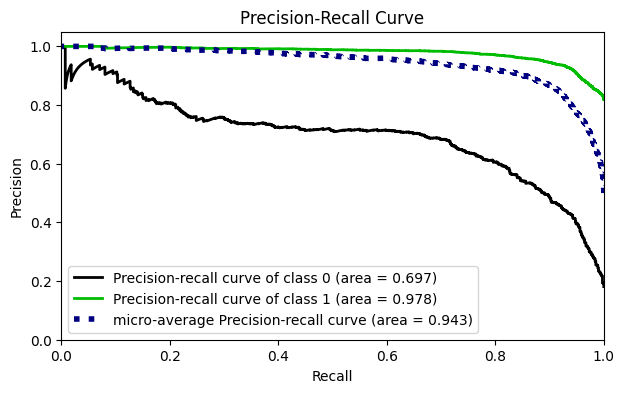

In [180]:
precision_recall_plot(naiveBayes_model_tfidf,X_test_tf_idf, y_test)

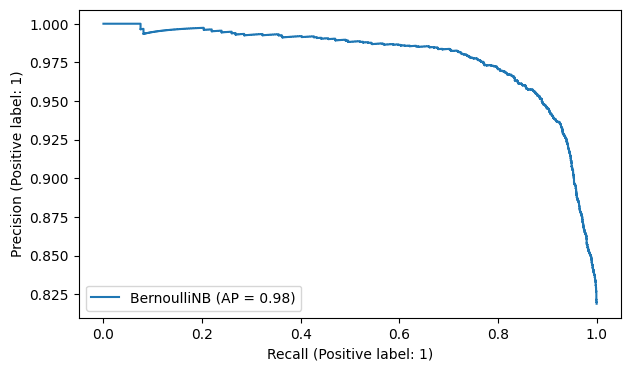

In [208]:
PrecisionRecallDisplay.from_estimator(naiveBayes_model_tfidf,X_test_tf_idf, y_test)

In [181]:
# save and store the scores to visualize them later
y_pred = naiveBayes_model_tfidf.predict(X_test_tf_idf)
y_pred_proba= naiveBayes_model_tfidf.predict_proba(X_test_tf_idf)[:,1]

NB_AP_tfidf = average_precision_score(y_test, y_pred_proba)
NB_tfidf_recall = recall_score(y_test, y_pred)
NB_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [182]:
SVM_model = SVC(C=0.07,#
                kernel='linear', # SVM with kernel linear give me very excellent results
               class_weight= "balanced",
                probability=True,
               random_state=101,)
SVM_model.fit(X_train_count,y_train)

KeyboardInterrupt: ignored

In [61]:
print('--------------------------------------')
print('              SVM Model               ')
print('--------------------------------------')
Eval(SVM_model , X_train_count, X_test_count)
# there are OVERFITTING

--------------------------------------
              SVM Model               
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 691  129]
 [ 510 3197]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.58      0.84      0.68       820
           1       0.96      0.86      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.85      0.80      4527
weighted avg       0.89      0.86      0.87      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.66      0.94      0.78      3280
           1       0.99      0.89      0.94     14827

    accuracy                           0.90     18107
   macro avg       0.82      0.92      0.86     18107
weighted avg       0.93      0.90      0.91     18107



In [ ]:
# Cross Validation
SVM_scores = CV_scores(SVM_model, X_train_count , y_train)
SVM_scores.mean()[2:]

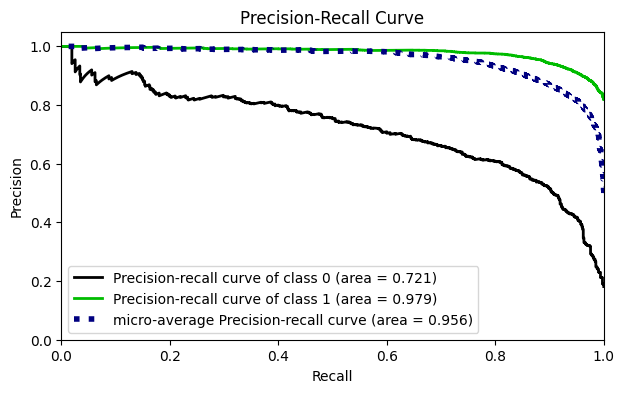

In [ ]:
precision_recall_plot(SVM_model,X_test_count, y_test)

In [ ]:
# save and store the scores to visualize them later
y_pred = SVM_model.predict(X_test_count)
y_pred_proba= SVM_model.predict_proba(X_test_count)[:,1]

SVM_AP_count = average_precision_score(y_test, y_pred_proba)
SVM_count_recall = recall_score(y_test, y_pred)
SVM_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [207]:
SVM_model_tfidf = SVC(C=0.07,#
                kernel='linear', # SVM with kernel linear give me very excellent results
               class_weight= "balanced",
                probability=True,
               random_state=101,)
SVM_model_tfidf.fit(X_train_tf_idf,y_train)

KeyboardInterrupt: ignored

In [ ]:
print('--------------------------------------')
print('              SVM Model               ')
print('--------------------------------------')
Eval(SVM_model_tfidf , X_train_tf_idf, X_test_tf_idf)

--------------------------------------
              SVM Model               
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 730   90]
 [ 618 3089]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.54      0.89      0.67       820
           1       0.97      0.83      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.84      0.86      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.57      0.92      0.71      3280
           1       0.98      0.85      0.91     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.88      0.81     18107
weighted avg       0.91      0.86      0.87     18107



## Random Forest

### Countvectorizer

In [183]:
RF_model = RandomForestClassifier(100,
                            max_depth=13, # high value cause overfitting
                            random_state = 101,
                            n_jobs = -1,
                            class_weight="balanced")
RF_model.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_jobs=-1,
                       random_state=101)

In [184]:
print('--------------------------------------')
print('       Random Forest Model            ')
print('--------------------------------------')
Eval(RF_model , X_train_count, X_test_count)


--------------------------------------
       Random Forest Model            
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 638  182]
 [ 491 3216]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.57      0.78      0.65       820
           1       0.95      0.87      0.91      3707

    accuracy                           0.85      4527
   macro avg       0.76      0.82      0.78      4527
weighted avg       0.88      0.85      0.86      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.65      0.89      0.75      3280
           1       0.97      0.89      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.81      0.89      0.84     18107
weighted avg       0.91      0.89      0.90     18107



In [185]:
# Cross Validation
RF_scores = CV_scores(RF_model, X_train_count , y_train)
RF_scores.mean()[2:]

test_accuracy      0.853538
train_accuracy     0.898241
test_precision     0.570796
train_precision    0.661244
test_recall        0.777134
train_recall       0.898950
test_f1            0.657923
train_f1           0.761946
dtype: float64

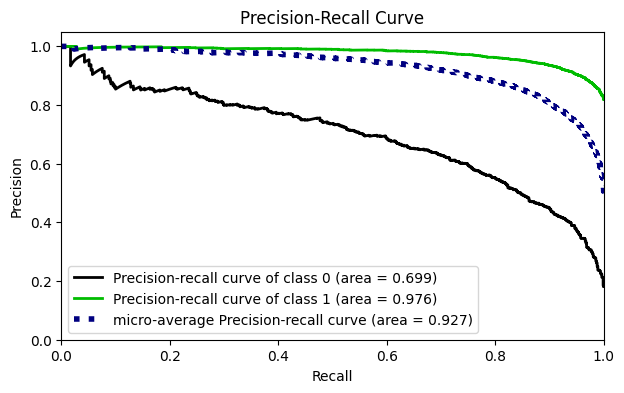

In [186]:
precision_recall_plot(RF_model,X_test_count, y_test)

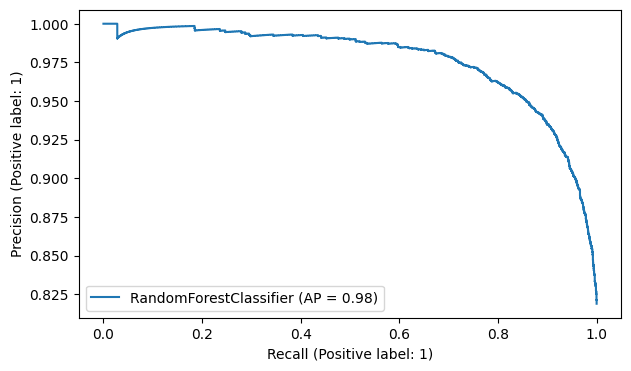

In [188]:

PrecisionRecallDisplay.from_estimator(RF_model,
                                      X_test_count,
                                      y_test);

In [187]:
# save and store the scores to visualize them later
y_pred = RF_model.predict(X_test_count)
y_pred_proba= RF_model.predict_proba(X_test_count)[:,1]

RF_AP_count= average_precision_score(y_test, y_pred_proba)
RF_count_recall = recall_score(y_test, y_pred)
RF_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [189]:
RF_model_tfidf = RandomForestClassifier(100,
                            max_depth=13, # high value cause overfitting
                            random_state = 101,
                            n_jobs = -1,
                            class_weight="balanced")
RF_model_tfidf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_jobs=-1,
                       random_state=101)

In [190]:
print('--------------------------------------')
print('       Random Forest Model            ')
print('--------------------------------------')
Eval(RF_model_tfidf , X_train_tf_idf, X_test_tf_idf)
#the precision of class 0 lower than the model with count vicrtoizer

--------------------------------------
       Random Forest Model            
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 653  167]
 [ 562 3145]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       820
           1       0.95      0.85      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.74      0.82      0.77      4527
weighted avg       0.87      0.84      0.85      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.63      0.91      0.74      3280
           1       0.98      0.88      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.80      0.90      0.83     18107
weighted avg       0.91      0.89      0.89     18107



In [57]:
# Cross Validation
RF_scores_tf = CV_scores(RF_model_tfidf, X_train_tf_idf , y_train)
RF_scores_tf.mean()[2:]

test_accuracy      0.840062
train_accuracy     0.893994
test_precision     0.542649
train_precision    0.646469
test_recall        0.759146
train_recall       0.916057
test_f1            0.632577
train_f1           0.757947
dtype: float64

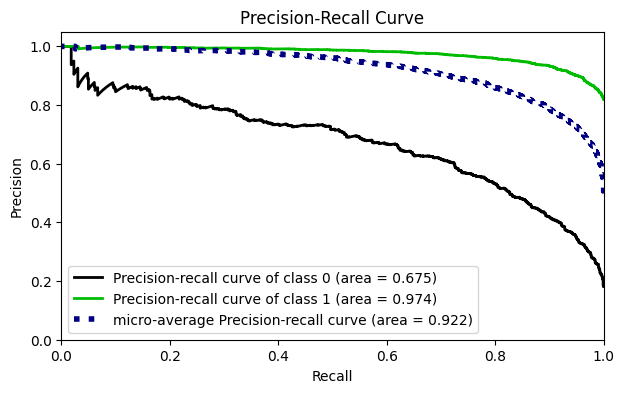

In [191]:
precision_recall_plot(RF_model_tfidf,X_test_tf_idf, y_test)

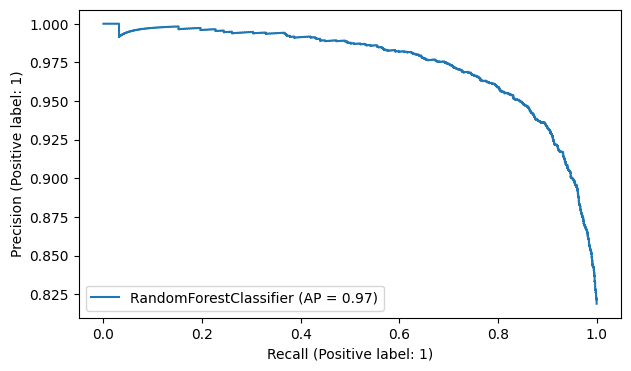

In [194]:
PrecisionRecallDisplay.from_estimator(RF_model_tfidf,
                                      X_test_tf_idf,
                                      y_test);

In [192]:
# save and store the scores to visualize them later
y_pred = RF_model_tfidf.predict(X_test_tf_idf)
y_pred_proba= RF_model_tfidf.predict_proba(X_test_tf_idf)[:,1]

RF_AP_tfidf = average_precision_score(y_test, y_pred_proba)
RF_tfidf_recall = recall_score(y_test, y_pred)
RF_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [195]:
Adaboost_model = AdaBoostClassifier(n_estimators= 200,
                         random_state = 101)
Adaboost_model.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=200, random_state=101)

In [196]:
print('--------------------------------------')
print('          Ada Boost Model             ')
print('--------------------------------------')
Eval(Adaboost_model , X_train_count, X_test_count)

--------------------------------------
          Ada Boost Model             
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 443  377]
 [ 182 3525]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       820
           1       0.90      0.95      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.81      0.75      0.77      4527
weighted avg       0.87      0.88      0.87      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.75      0.58      0.65      3280
           1       0.91      0.96      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.83      0.77      0.79     18107
weighted avg       0.88      0.89      0.88     18107



In [197]:
# Cross Validation
Adb_scores = CV_scores(Adaboost_model, X_train_count , y_train)
Adb_scores.mean()[2:]

test_accuracy      0.876236
train_accuracy     0.889398
test_precision     0.703235
train_precision    0.748865
test_recall        0.548780
train_recall       0.585942
test_f1            0.616403
train_f1           0.657448
dtype: float64

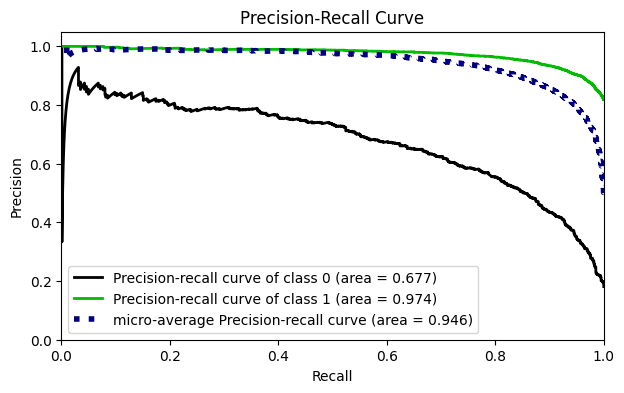

In [198]:
precision_recall_plot(Adaboost_model,X_test_count, y_test)

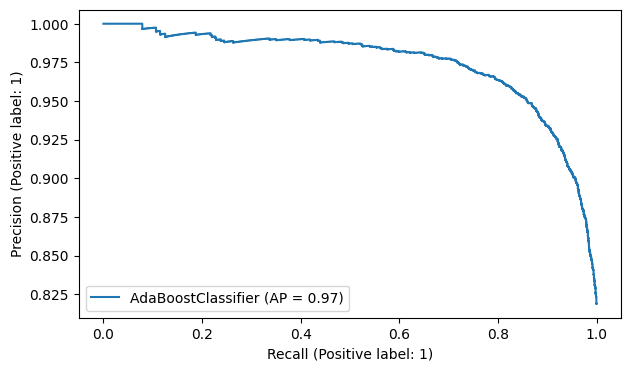

In [203]:
PrecisionRecallDisplay.from_estimator(Adaboost_model,
                                      X_test_count,
                                      y_test);

In [199]:
# save and store the scores to visualize them later
y_pred = Adaboost_model.predict(X_test_count)
y_pred_proba= Adaboost_model.predict_proba(X_test_count)[:,1]

Ada_AP_count= average_precision_score(y_test, y_pred_proba)
Ada_count_recall = recall_score(y_test, y_pred)
Ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [200]:
Adaboost_model_tfidf = AdaBoostClassifier(n_estimators= 200,
                         random_state = 101)
Adaboost_model_tfidf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=200, random_state=101)

In [201]:
print('--------------------------------------')
print('          Ada Boost Model             ')
print('--------------------------------------')
Eval(Adaboost_model_tfidf , X_train_tf_idf, X_test_tf_idf)

--------------------------------------
          Ada Boost Model             
--------------------------------------
  
Confusion Matrix   
---------------------------------
[[ 470  350]
 [ 191 3516]]
  
Test_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       820
           1       0.91      0.95      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.81      0.76      0.78      4527
weighted avg       0.87      0.88      0.88      4527

  
Train_Set
---------------------------------
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      3280
           1       0.92      0.96      0.94     14827

    accuracy                           0.90     18107
   macro avg       0.84      0.79      0.81     18107
weighted avg       0.89      0.90      0.89     18107



In [202]:
# Cross Validation
Adb_scores_tf = CV_scores(Adaboost_model_tfidf, X_train_tf_idf , y_train)
Adb_scores_tf.mean()[2:]

test_accuracy      0.873198
train_accuracy     0.897486
test_precision     0.689664
train_precision    0.766297
test_recall        0.546646
train_recall       0.624560
test_f1            0.609362
train_f1           0.688202
dtype: float64

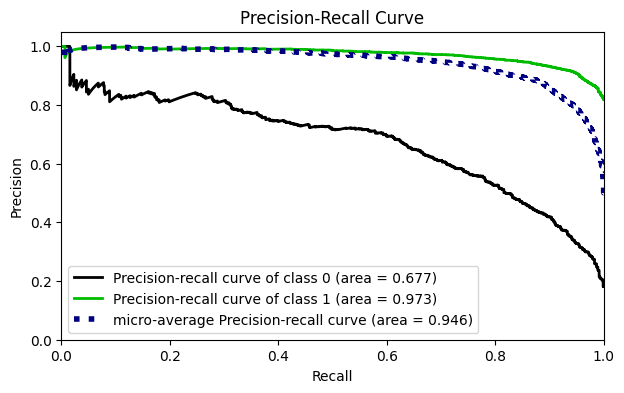

In [204]:
precision_recall_plot(Adaboost_model_tfidf,X_test_tf_idf, y_test)

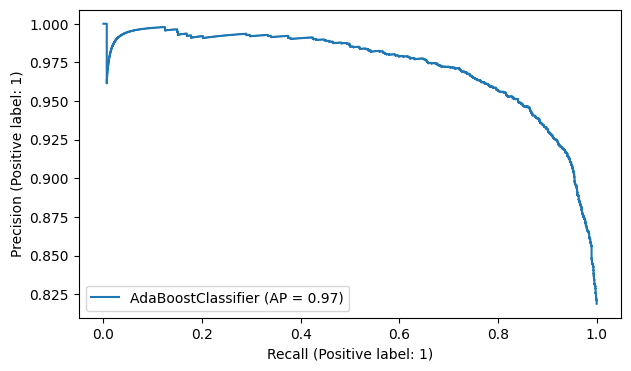

In [205]:
PrecisionRecallDisplay.from_estimator(Adaboost_model_tfidf,X_test_tf_idf, y_test)

In [206]:
# save and store the scores to visualize them later
y_pred = Adaboost_model_tfidf.predict(X_test_tf_idf)
y_pred_proba= Adaboost_model_tfidf.predict_proba(X_test_tf_idf)[:,1]

Ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
Ada_tfidf_recall = recall_score(y_test, y_pred)
Ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout #GRU  is the unit in the RNN that contains the neurons and gates
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df_new is our dataframe after executed feature selection , deleting null and duplicates values and splitting to X|Y .

In [70]:
df_new.shape

(22634, 2)

In [71]:
df_new.head()

,ReviewText,Recommendation
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Tokenization

In [72]:
num_words = 15001 # we add 1.
#Because only the most common num_words-1 words will be kept.
# choosing num_words arbitrary

In [73]:
# tokenizer function
tokenizer = Tokenizer(num_words=num_words,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      )
# The Tokenizer function separates all texts into word tokens.

In [74]:
tokenizer.fit_on_texts(X)
# fit_on_texts first tokenizes the texts in the corpus and then identifies all unique tokens
#and assigns them numbers based on their frequency of use.
# The most frequently used token is assigned the number 1.

### Creating word index

In [75]:
# Unique words after toknization with the frequencies
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [76]:
len(tokenizer.word_index)

#There are a total of 14847 unique tokens in our corpus.

14847

### Converting tokens to numeric

In [77]:
X_num_tokens = tokenizer.texts_to_sequences(X)

# The function "texts_to_sequences" converts all tokens in each document/row of our data into numbers according to their usage frequency in the
# word_index (since num_words=10001, only the first 10000 most frequently used tokens will be used).

In [78]:
X[:2]

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
Name: ReviewText, dtype: object

In [79]:
X_num_tokens[:2]
#after converting the above sentences to numerics
# it will replace the token with it's respective rank

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1712,
  99,
  2,
  1321,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  453,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95]]

### Maximum number of tokens for all documents¶

 we need to fix the number of tokens we want to give to our model because we have fixed number of neurons in our model

In [80]:
len(X_num_tokens[1654])# random sentence , to see whats the average  number of tokens
# The 1654th user query consists of 67 tokens.

67

In [81]:
len(X_num_tokens[16])# random sentence , to see whats the average  number of tokens
# The 16th user query consists of 73 tokens.

73

In [82]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# Firstly, we aaggregate the sizes of all the lines/documnets in the corpus
#then save it to the variable num_tokens by putting them into a list.
# finally convert the list to array

In [83]:
num_tokens
# Showing the number of tokens for each line/document

array([ 7, 62, 97, ..., 42, 85, 19])

In [84]:
num_tokens.mean()# Calcilate the average of all tokens

60.60934876734117

In [85]:
num_tokens.max()#longest line

#it is recommended to fix all documents to 35, which is the length of the longest document,
#  to prevent information/token loss in the documents.

116

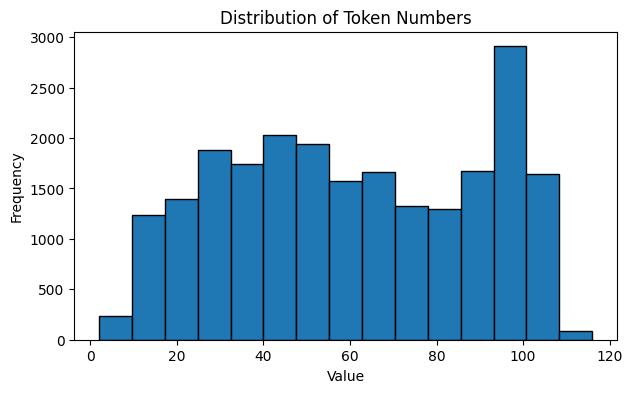

In [86]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=15, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
# Through the visualization of the distribution below
# The optimal number of tokens is 116 equal to the max tokens

In [87]:
max_tokens = 116

In [88]:
sum(num_tokens <= max_tokens) / len(num_tokens)
# to make sure that there would be no information/token loss
#And the ratio will be above 95% for which value of max_tokens?

1.0

In [89]:
sum(num_tokens <= max_tokens)
# When max_tokens is 116, out of a total of 22634 documents in my corpus
#there is no information/token loss yaaaaaaasss

22634

In [90]:
len(num_tokens)

# number of all documents/lines in corpus

22634

### Fixing token counts of all documents (pad_sequences)

it make all the values at the same length
This is important for Embedding layer

In [91]:
# Fix all the documents length by pad_sequences function
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")
# padding="pre", paddings and truncating are performed from the beginning.
# padding by adding 0's from the front

In [92]:
X_pad.shape
# We see that all comments are fixed to 116 tokens.

(22634, 116)

### Train Set Split

In [129]:
SEED=42

In [137]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=SEED)
# keep the distribution of the data across the train and test same distribution across chunks

In [138]:
# Making the Validation set from the training set
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train1,y_train1,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=SEED)

### Modeling

In [124]:
model = Sequential()
# Sequential model

In [125]:
embedding_size = 50
# We specify the dimensionality/size of each vector for the tokens that we will provide to the DL model.
#the larger this number is, the higher ,the computational cost

In [126]:
# Model Architecture
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))# The Embedding layer is a layer used in NLP models and consists of a 3-dimensional tensor.
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
# We set return_sequences=True because the next layer is a GRU layer.

model.add(GRU(units=12, return_sequences=False))
# We set return_sequences=False because the next layer is a Dense layer.


model.add(Dense(1, activation='sigmoid'))

In [131]:
#identifying the learning rate
optimizer = Adam(learning_rate=0.001)

In [132]:
# Model compile (adjust the optimization parameters.)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [134]:
#Sequential model summary
model.summary()
# 1 Embedding layer
# 3 GRU layer
# 2 Dropout layer
# Total parameters 772542

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 116, 50)           750050    
                                                                 
 dropout_39 (Dropout)        (None, 116, 50)           0         
                                                                 
 gru_3 (GRU)                 (None, 116, 50)           15300     
                                                                 
 gru_4 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_40 (Dropout)        (None, 116, 25)           0         
                                                                 
 gru_5 (GRU)                 (None, 12)                1404      
                                                                 
 dense_2 (Dense)             (None, 1)                

In [135]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2, restore_best_weights=True)

In [136]:
# Compute the Class weights
# to tackle the class imbalance in our data
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train1)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

In [140]:
model.fit(X_train1, y_train1,
          epochs=20, batch_size=128,
          validation_data=(X_val,y_val),
          sample_weight= classes_weights,
          callbacks=[early_stop])

Epoch 1/20
144/144 [==============================] - 33s 149ms/step - loss: 0.4293 - recall: 0.9796 - val_loss: 0.2875 - val_recall: 0.9543
Epoch 2/20
144/144 [==============================] - 20s 137ms/step - loss: 0.2574 - recall: 0.9410 - val_loss: 0.2402 - val_recall: 0.9387
Epoch 3/20
144/144 [==============================] - 20s 136ms/step - loss: 0.1988 - recall: 0.9488 - val_loss: 0.2376 - val_recall: 0.9303
Epoch 3: early stopping


In [141]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.429293,0.979555,0.287480,0.954327
1,0.257361,0.940996,0.240181,0.938702
2,0.198766,0.948788,0.237556,0.930288


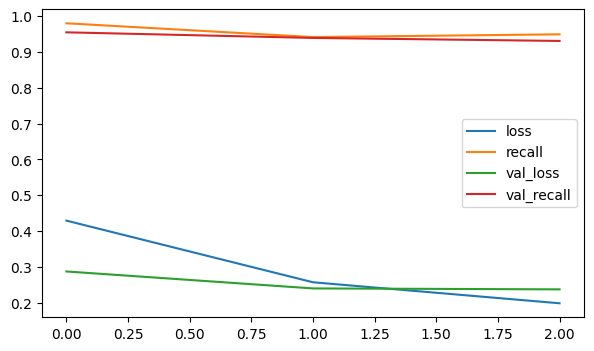

In [142]:
model_loss.plot();

### Model Evaluation

In [143]:
model.evaluate(X_test1, y_test1)

71/71 [==============================] - 2s 26ms/step - loss: 0.3122 - recall: 0.9450


[0.3121625781059265, 0.9449838399887085]

In [144]:
y_pred = model.predict(X_test1) >= 0.5

print(confusion_matrix(y_test1, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test1, y_pred))

71/71 [==============================] - 5s 24ms/step
[[ 223  187]
 [ 102 1752]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       410
           1       0.90      0.94      0.92      1854

    accuracy                           0.87      2264
   macro avg       0.79      0.74      0.77      2264
weighted avg       0.86      0.87      0.87      2264



In [145]:
y_train_pred = model.predict(X_train1) >= 0.5

print(confusion_matrix(y_train1, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train1, y_train_pred))

573/573 [==============================] - 11s 20ms/step
[[ 2075  1242]
 [  721 14295]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3317
           1       0.92      0.95      0.94     15016

    accuracy                           0.89     18333
   macro avg       0.83      0.79      0.81     18333
weighted avg       0.89      0.89      0.89     18333



71/71 [==============================] - 2s 27ms/step


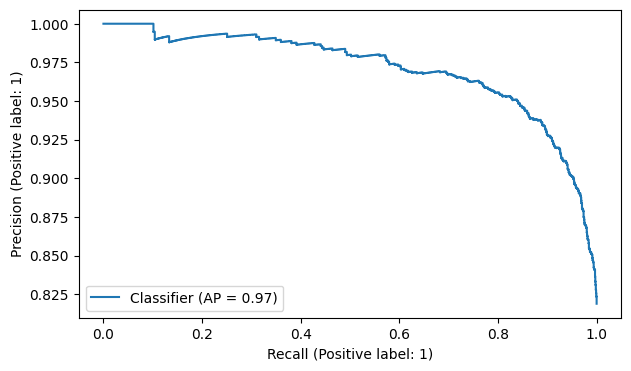

In [146]:
y_pred_proba = model.predict(X_test1)

PrecisionRecallDisplay.from_predictions(y_test1, y_pred_proba)


In [148]:

average_precision_score(y_test1, y_pred_proba)

0.9705730879237049

In [149]:
DL_AP = average_precision_score(y_test1, y_pred_proba)
DL_f1 = f1_score(y_test1, y_pred)
DL_rec = recall_score(y_test1, y_pred)

---------------------------------------------------------------------------

## BERT Modeling

In [6]:
!pip install transformers

In [13]:
import tensorflow as tf
import os
# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# to find the address of the tpu ,where is the tpu in the device
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# With this code, 8 TPU cores are allocated.

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


### Read Data

df_new is our dataframe after executed feature selection , deleting null and duplicates values and splitting to X|Y .

### Train test split

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

### Tokenization

### Fixing token counts of all documents

In [32]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [33]:
np.array(num_of_sent_tokens).mean()

76.75947689316956

In [34]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [35]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [36]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [37]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [38]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [39]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [40]:
Xids_train

array([[ 101, 2023, 4377, ...,    0,    0,    0],
       [ 101, 1045, 2031, ...,    0,    0,    0],
       [ 101, 2061, 3730, ...,    0,    0,    0],
       ...,
       [ 101, 4149, 2023, ...,    0,    0,    0],
       [ 101, 1996, 5495, ...,    0,    0,    0],
       [ 101, 2034, 1010, ...,    0,    0,    0]])

In [41]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20370, 162)
Xmask_train.shape : (20370, 162)
Xids_test.shape   : (2264, 162)
Xmask_test.shape  : (2264, 162)


In [42]:
labels_train = y_train2.values.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [43]:
labels_test = y_test2.values.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [44]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [45]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [46]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [47]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [48]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [49]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [7]:
!pip install -q tf-models-official

In [50]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [51]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [52]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

In [53]:
import tensorflow as tf
strategy = tf.distribute.TPUStrategy(resolver)

# To take advantage of the speed of TPU cores, we assign the 8 allocated TPU cores to the strategy variable.

In [54]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [56]:

with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

### Model Fiting

In [57]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
637/637 [==============================] - 214s 199ms/step - loss: 0.5912 - recall_1: 0.7224 - val_loss: 0.8039 - val_recall_1: 0.8857
Epoch 2/2
637/637 [==============================] - 70s 110ms/step - loss: 0.4793 - recall_1: 0.8529 - val_loss: 0.4051 - val_recall_1: 0.9439


In [58]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                       

### Model evaluation

In [59]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_1,val_loss,val_recall_1
0,0.591235,0.722362,0.803917,0.885653
1,0.479307,0.852878,0.405075,0.943905


<Axes: >

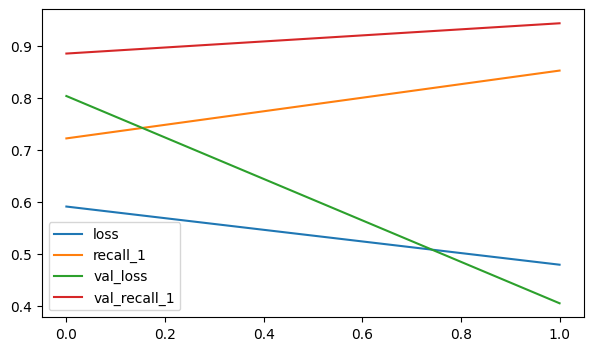

In [60]:
model_loss.plot()

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 37s 170ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       410
           1       0.96      0.94      0.95      1854

    accuracy                           0.92      2264
   macro avg       0.86      0.88      0.87      2264
weighted avg       0.92      0.92      0.92      2264



In [62]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 24s 35ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3690
           1       0.97      0.97      0.97     16680

    accuracy                           0.95     20370
   macro avg       0.91      0.92      0.92     20370
weighted avg       0.95      0.95      0.95     20370



In [67]:
average_precision_score(y_test2, y_pred_proba)

0.9895564533791328

In [68]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

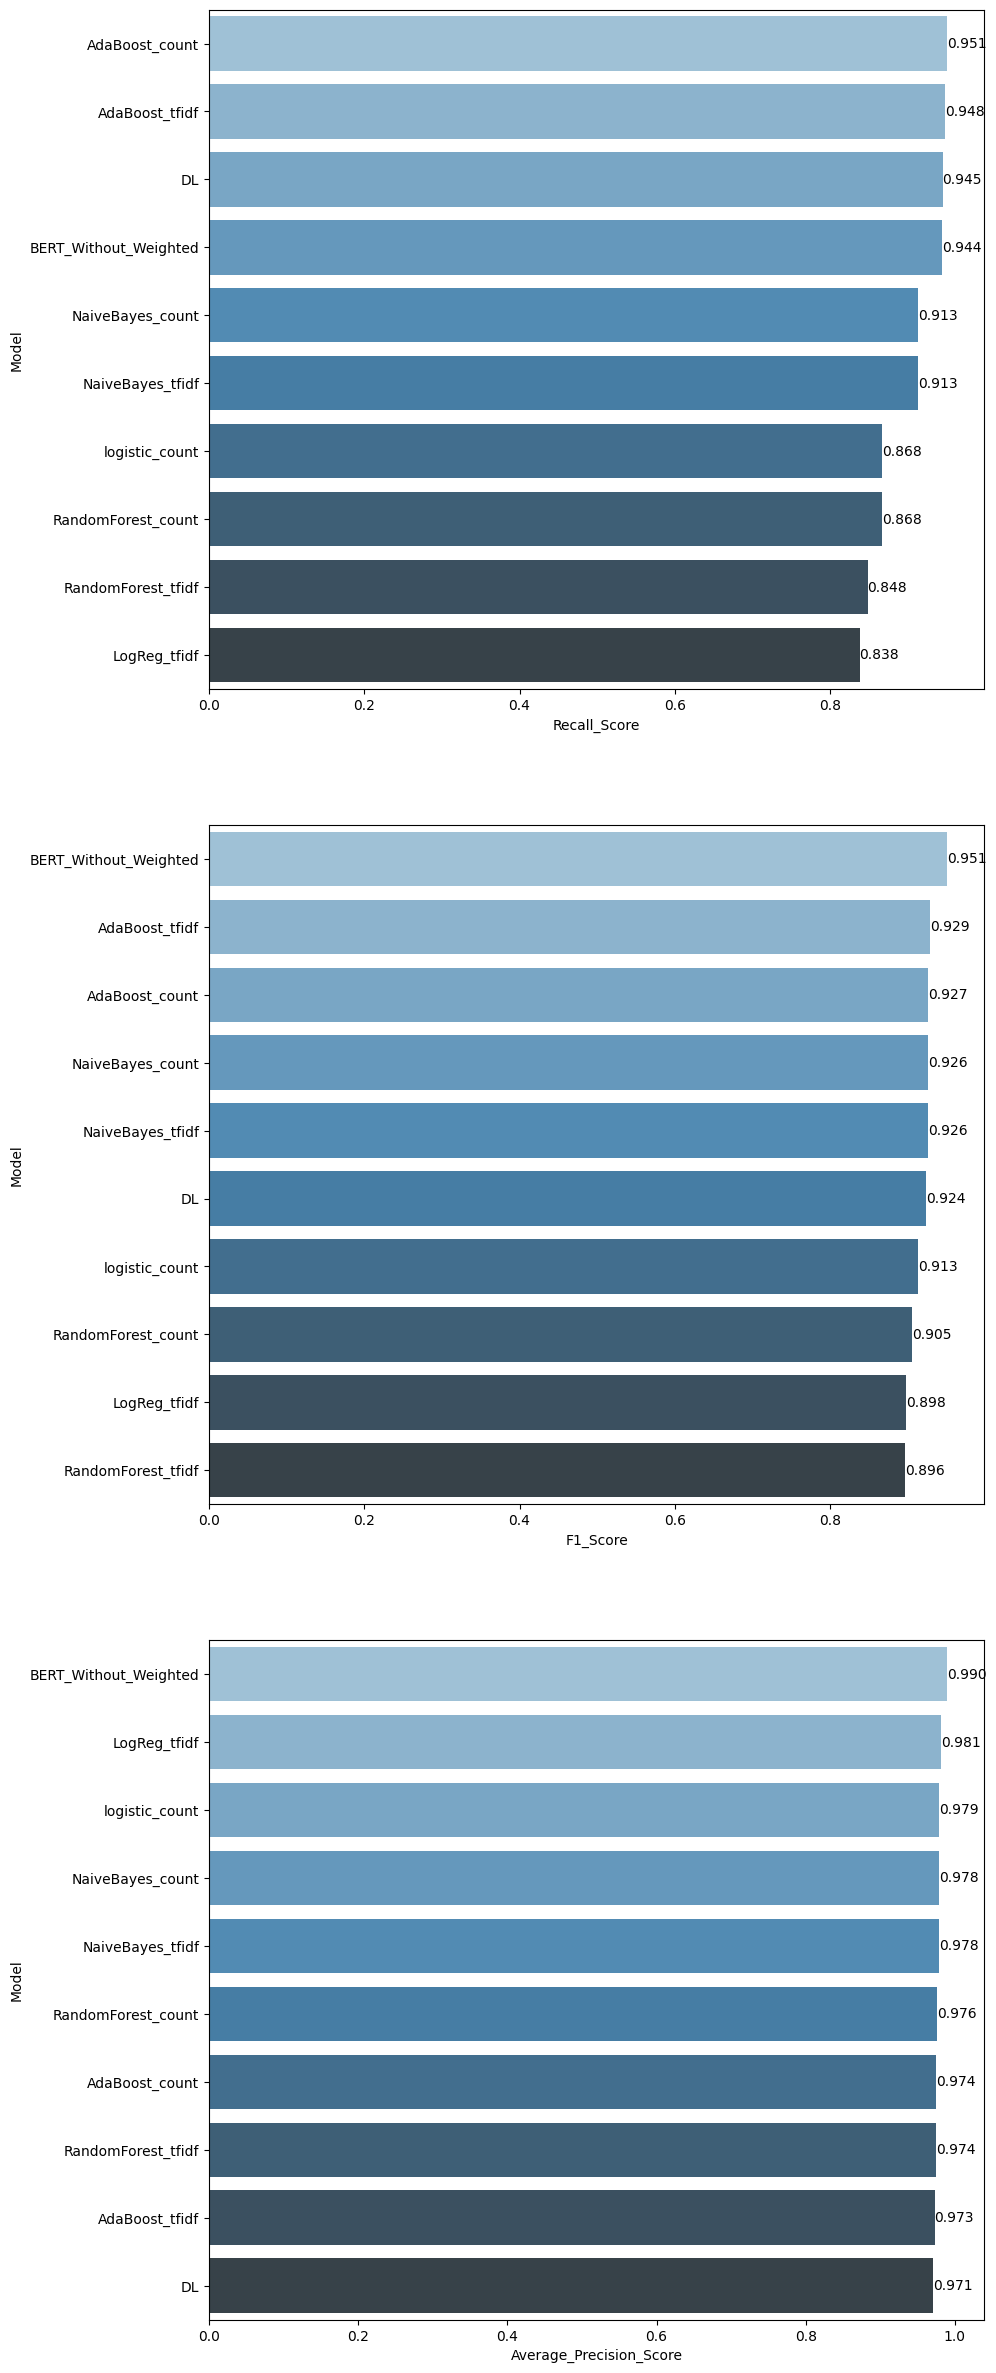

In [213]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "logistic_count", "RandomForest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf",
                                  "RandomForest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Without_Weighted"],

                        "F1_Score": [NB_count_f1, log_count_f1,  RF_count_f1, Ada_count_f1, NB_tfidf_f1,
                                     log_tfidf_f1,  RF_tfidf_f1, Ada_tfidf_f1, DL_f1, BERT_without_weighted_f1],

                        "Recall_Score": [NB_count_recall, log_count_recall,  RF_count_recall, Ada_count_recall, NB_tfidf_recall,
                                         log_tfidf_recall, RF_tfidf_recall, Ada_tfidf_recall, DL_rec, BERT_without_weighted_rec],

                        "Average_Precision_Score": [NB_AP_count, log_AP_count, RF_AP_count, Ada_AP_count, NB_AP_tfidf,
                                                    log_AP_tfidf, RF_AP_tfidf, Ada_AP_tfidf, DL_AP, BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

The best model using Average percision is :

1.   Bert Model
2.   Logistic Regression model - TF_IDF
1.   Logistic Regression model - count







The best model using Recall is :

1.   Ada Boost Model-count
2.   Ada Boost model - TF_IDF
1.   Bert Model

The best model using F1 is :

1.   Bert Model
2.   Ada Boost model - TF-IDF
1.   Ada Boost model - count

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___